# Apply new EIS calibration to our maps

In [1]:
import sys
import pathlib

import astropy.units as u
import astropy.table
import astropy.time
import matplotlib.pyplot as plt
import numpy as np
import sunpy.time
import sunpy.map
import eispac

from astropy.visualization import time_support

sys.path.append('../../../../projects/EISPAC-Tutorial___Calibrations/')
from eis_calibration.eis_calib_2023 import anytim2tai, calib_2023

sys.path.append('../scripts')
from correct_eis_pointing import fix_eis_calibration

In [2]:
fix_eis_calibration('../data/noaa_11944/EIS/level_2.5/', '../data/noaa_11944/EIS/level_2.6/')
fix_eis_calibration('../data/noaa_11967/EIS/level_2.5/', '../data/noaa_11967/EIS/level_2.6/')
fix_eis_calibration('../data/noaa_11990/EIS/level_2.5/', '../data/noaa_11990/EIS/level_2.6/')

In [12]:
ar_table = astropy.table.QTable.read('../data/tables/mason_ars_region_1.asdf')

In [2]:
m = sunpy.map.Map('../data/noaa_11944/EIS/level_2.5/eis_20140108_095727.fe_12_195_119.2c-0.int.fits')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


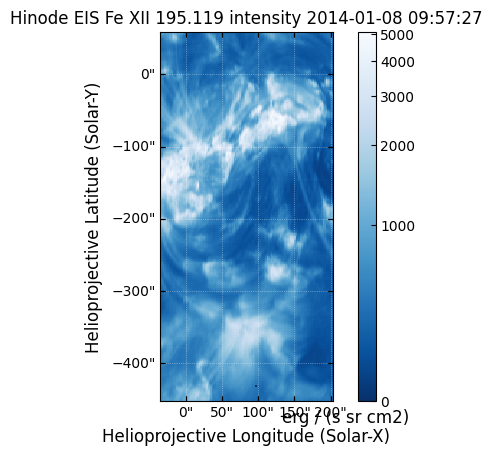

In [3]:
m.peek()

In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
m_new_calib = calib_2023(m)

In [8]:
from astropy.visualization import ImageNormalize

In [3]:
(m_new_calib).peek(norm=ImageNormalize())

NameError: name 'm_new_calib' is not defined

In [81]:
foo = astropy.time.Time('2000-01-01',format='iso',scale='tai') + np.linspace(-60,60,1000) * u.year

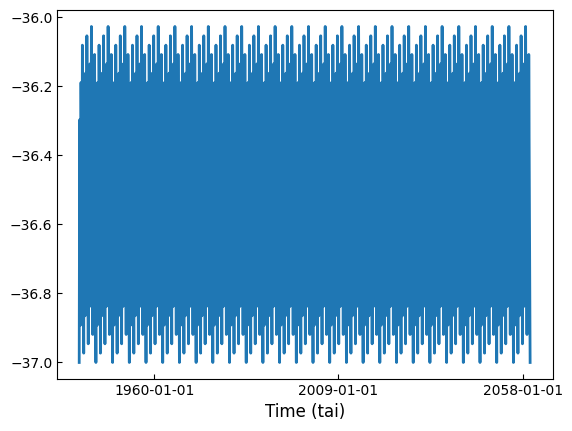

In [82]:
with time_support():
    plt.plot(foo, foo.tai_seconds - np.array([anytim2tai(f) for f in foo.iso]))